# Evaultion of the models

<!--
SPDX-FileCopyrightText: 2025 Johannes Herstad and Sigurd Gjerdingen
SPDX-License-Identifier: MIT
-->

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, load_saved_model
from src.evaluation import evaluate_regression_model, evaluate_classification_model
from src.utils import plot_predictions_vs_actual

# Load the default configuration
config = Config()

# MIT_Stanford

## Regression

In [2]:
config.use_aachen = False  # Activate the MIT_Stanford dataset

### LSTM

2025-04-10 11:27:28,888 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 - mae: 0.1073  
RMSE: 0.09419647831324696
MAE: 0.06826484948396683
R2: 0.687730644052655


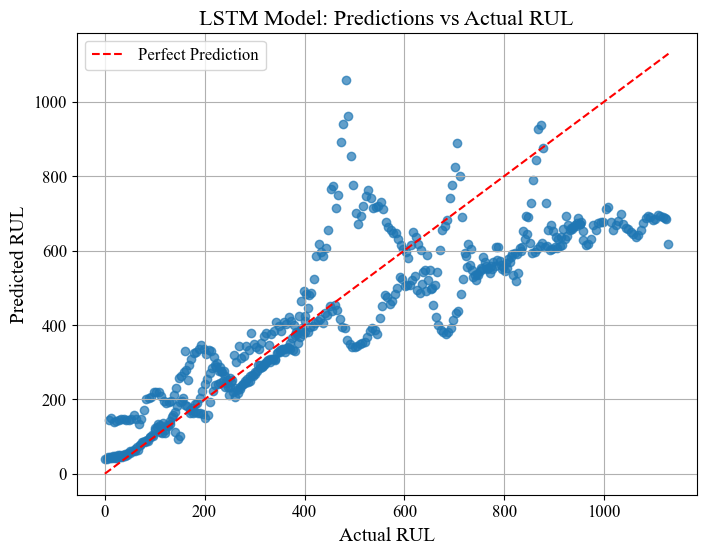

In [ ]:
config.model_task = "lstm_regression"  # Set the model task

lstm_model = load_saved_model(config)

# Load preprocessed data for regression
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)
y_pred = lstm_model.predict(X_test)

# Evaluate the model
rmse, mae, r2 = evaluate_regression_model(lstm_model, X_test, y_test)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")

# Plot predictions vs actual values
plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LSTM Model: Predictions vs Actual RUL")


### DecisionTree Regressor

2025-04-10 11:10:10,997 - INFO - Test Loss (MSE): 0.0106
2025-04-10 11:10:10,998 - INFO - Test MAE (rescaled): 134.1696


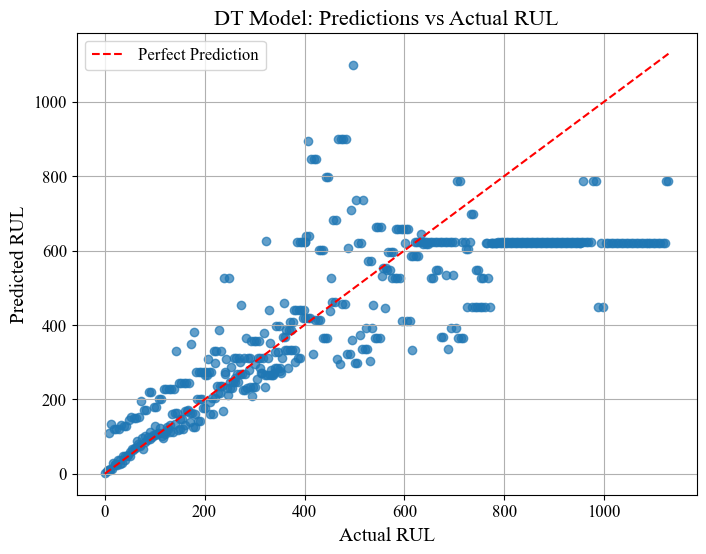

In [ ]:
config.model_task = "dt_regression" 

dt_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = dt_model.predict(X_test_flat)
evaluate_regression_model(dt_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="DT Model: Predictions vs Actual RUL")

### Linear Regression

2025-04-10 11:11:16,855 - INFO - Test Loss (MSE): 0.0134
2025-04-10 11:11:16,883 - INFO - Test MAE (rescaled): 180.4593


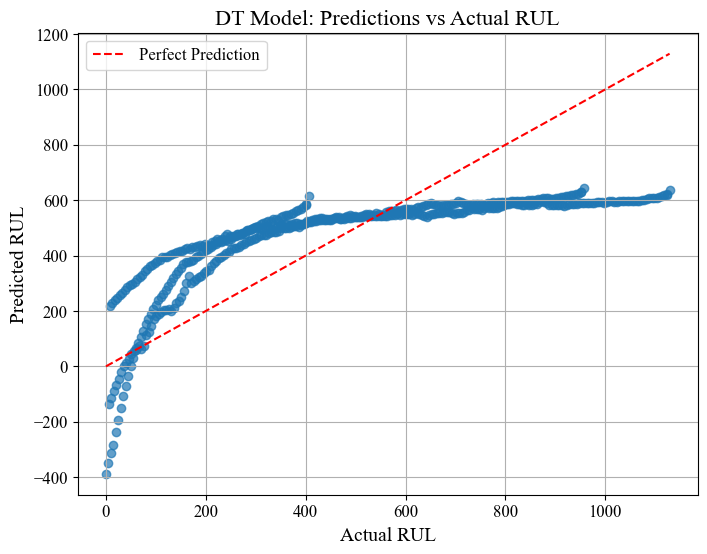

In [ ]:
config.model_task = "lr_regression" 

lr_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lr_model.predict(X_test_flat)
evaluate_regression_model(lr_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LR Model: Predictions vs Actual RUL")

### Lasso Regression

2025-04-10 11:12:26,926 - INFO - Test Loss (MSE): 0.0134
2025-04-10 11:12:26,928 - INFO - Test MAE (rescaled): 180.4641


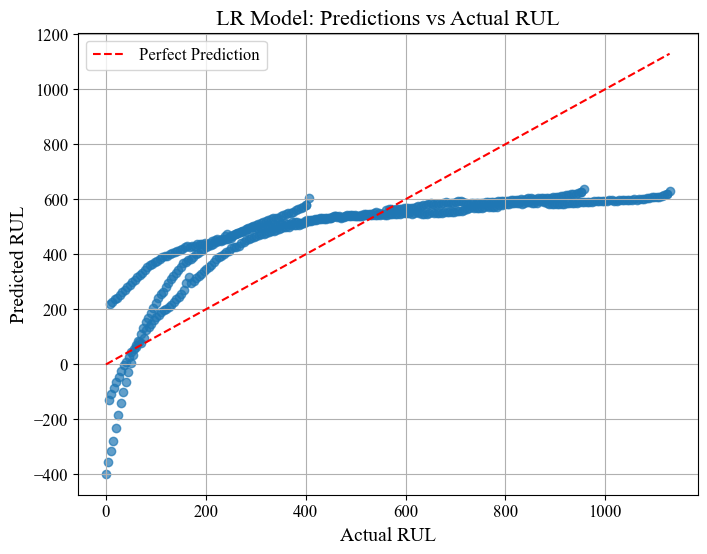

In [ ]:
config.model_task = "lasso_regression" 

lasso_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lasso_model.predict(X_test_flat)
evaluate_regression_model(lasso_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="Lasso Model: Predictions vs Actual RUL")

## Classification

### CNN

2025-04-10 12:54:57,377 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7249 - loss: 0.7090


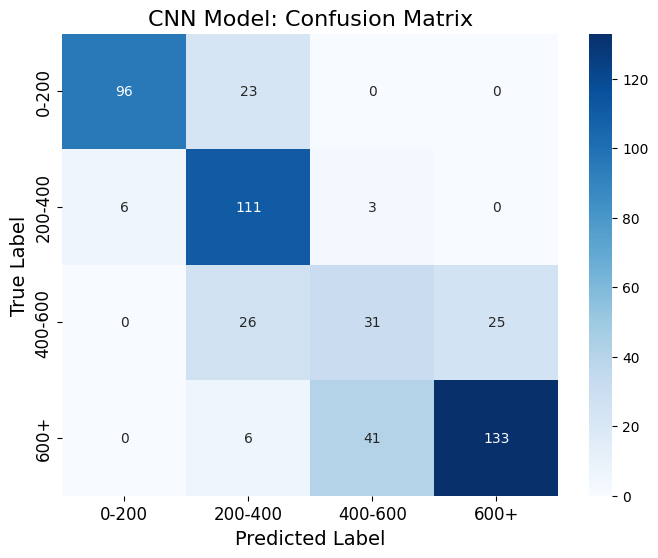

2025-04-10 12:54:57,830 - INFO - Classification Report:
              precision    recall  f1-score   support

       0-200       0.94      0.81      0.87       119
     200-400       0.67      0.93      0.78       120
     400-600       0.41      0.38      0.39        82
        600+       0.84      0.74      0.79       180

    accuracy                           0.74       501
   macro avg       0.72      0.71      0.71       501
weighted avg       0.75      0.74      0.74       501



In [ ]:
config.model_task = "cnn_classification"  

cnn_model = load_saved_model(config)

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)

evaluate_classification_model(config, cnn_model, X_test, y_test, labels=config.labels, title="CNN Model: Confusion Matrix")

# Aachen  

## Regression

In [2]:
config.use_aachen = True  # Activate the Aachen dataset

### LSTM

2025-04-22 10:04:36,182 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.65


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6597e-04 - mae: 0.0183  
RMSE: 0.022997487065412506
MAE: 0.019057169556617737
R2: 0.9893070462614232


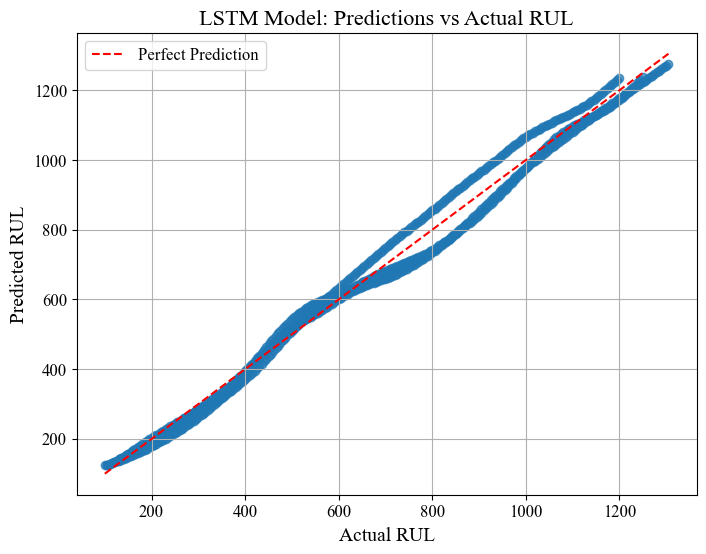

In [3]:
config.model_task = "lstm_regression"  # Set the model task

lstm_model = load_saved_model(config)

# Load preprocessed data for regression
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)
y_pred = lstm_model.predict(X_test)

# Evaluate the model
rmse, mae, r2, _, _ = evaluate_regression_model(lstm_model, X_test, y_test)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")

# Plot predictions vs actual values
plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LSTM Model: Predictions vs Actual RUL")


### DecisionTree Regressor

RMSE: 0.027237613070975226
MAE: 0.022816472291625478
R2: 0.9850005609546136


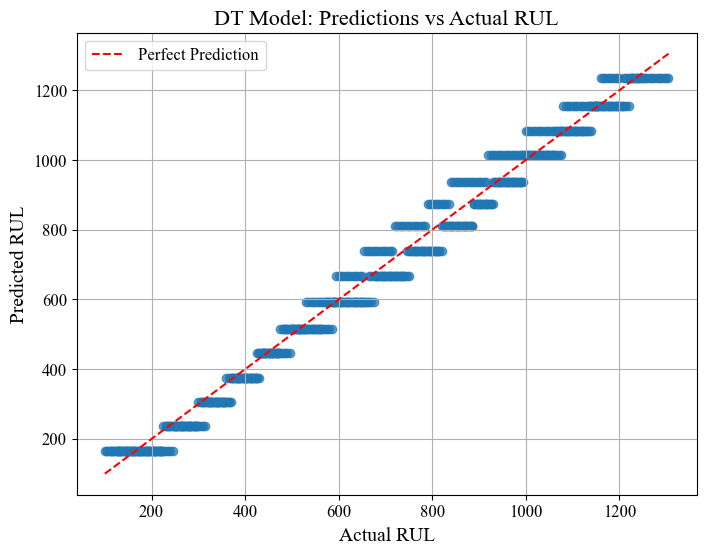

In [4]:
config.model_task = "dt_regression" 

dt_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = dt_model.predict(X_test_flat)

# Evaluate the model
rmse, mae, r2, _, _ = evaluate_regression_model(dt_model, X_test_flat, y_test, metadata["y_max"])
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="DT Model: Predictions vs Actual RUL")

### Linear Regression

RMSE: 0.04140267281877427
MAE: 0.030284600495530476
R2: 0.9653427832527574


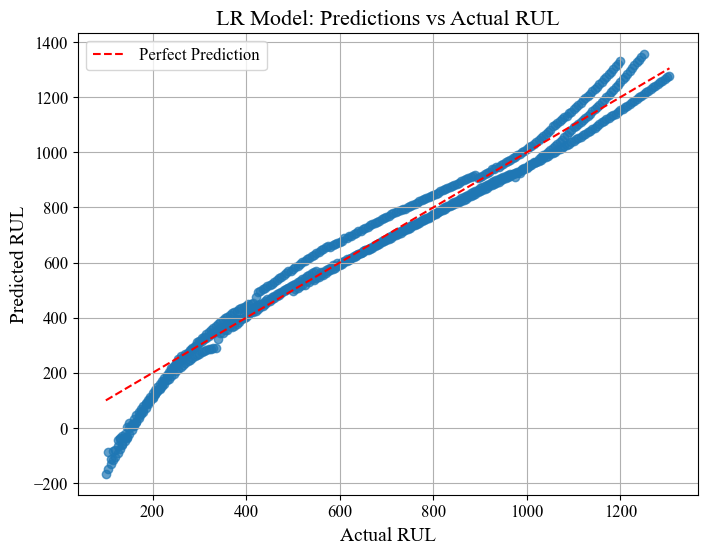

In [5]:
config.model_task = "lr_regression" 

lr_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lr_model.predict(X_test_flat)

# Evaluate the model
rmse, mae, r2, _, _ = evaluate_regression_model(lr_model, X_test_flat, y_test, metadata["y_max"])
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LR Model: Predictions vs Actual RUL")

### Lasso Regression

RMSE: 0.04568812206635124
MAE: 0.03302453606874215
R2: 0.9577969789854537


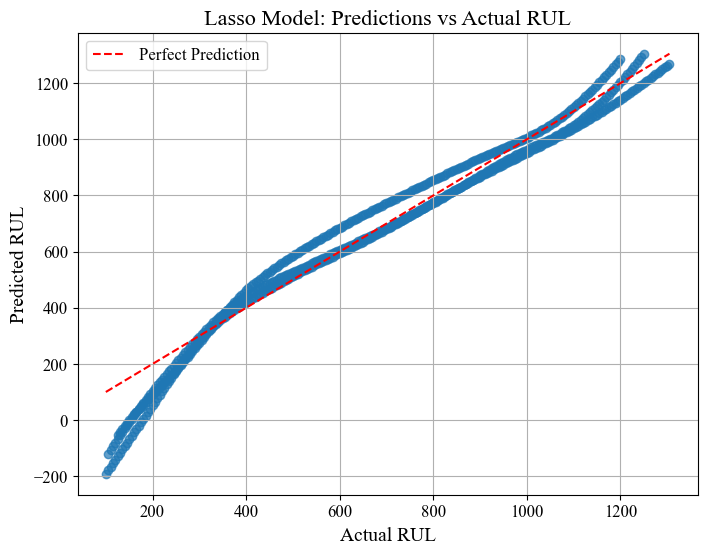

In [6]:
config.model_task = "lasso_regression" 

lasso_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lasso_model.predict(X_test_flat)

# Evaluate the model
rmse, mae, r2, _, _ = evaluate_regression_model(lasso_model, X_test_flat, y_test, metadata["y_max"])
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")


plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="Lasso Model: Predictions vs Actual RUL")

## Classification

### CNN

2025-04-22 10:04:40,559 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.65


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9498 - loss: 0.1362


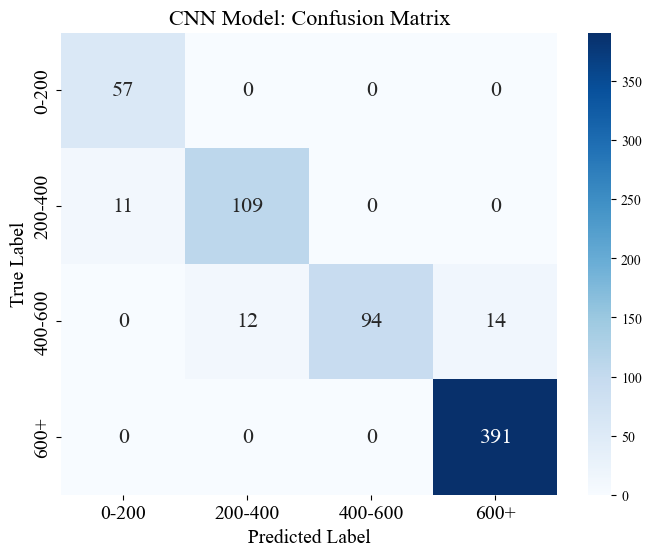

              precision    recall  f1-score   support

       0-200       0.84      1.00      0.91        57
     200-400       0.90      0.91      0.90       120
     400-600       1.00      0.78      0.88       120
        600+       0.97      1.00      0.98       391

    accuracy                           0.95       688
   macro avg       0.93      0.92      0.92       688
weighted avg       0.95      0.95      0.94       688



(0.9462209343910217, 0.9193702621378502)

In [7]:
config.model_task = "cnn_classification"  

cnn_model = load_saved_model(config)

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)

evaluate_classification_model(config, cnn_model, X_test, y_test, labels=config.labels, title="CNN Model: Confusion Matrix")